In [3]:
import pandas as pd
import numpy as np

# Read the CSV file
folds = 10
speciess = ["H", "N", "O", "O2", "N2", "He"] #, 
m_ests = [200, 400]
for m_est in m_ests:
    for species in speciess:
        print(f"Processing {species}")
        rmspe_list = []
        for fold in range(1, folds):
            name_ = f"{species}" # f"{species}"
            dir = f"../log/satellite/{name_}" 
            file_name = f"{dir}/logFile_numPointsTotal1800000_numBlocksTotal18000_m{m_est}_seed{fold}_isScaled1_{species}.csv"
            try:
                df = pd.read_csv(file_name)
            except FileNotFoundError:
                print(f"File {file_name} not found")
                continue

            # Calculate mean for each fold
            rmspe_list.append(df['rmspe'].iloc[:])  # Get the third row (index 2 since 0-based)

        # Display the means
        # print("Mean values for each fold:")
        # print(rmspe_list)

        # Calculate overall mean
        overall_mean = np.mean(rmspe_list, axis=0)
        print("\nOverallmean:", overall_mean)


Processing H

Overallmean: [-1.]
Processing N

Overallmean: [-1.]
Processing O

Overallmean: [-1.]
Processing O2

Overallmean: [-1.]
Processing N2

Overallmean: [-1.]
Processing He

Overallmean: [-1.]
Processing H

Overallmean: [-1.]
Processing N

Overallmean: [-1.]
Processing O

Overallmean: [-1.]
Processing O2

Overallmean: [-1.]
Processing N2

Overallmean: [-1.]
Processing He

Overallmean: [-1.]


In [4]:
import pandas as pd
import numpy as np

# Read the CSV file
num_m_ests = [200, 400] #[100, 200]
folds = 10
speciess = ["N", "O2", "N2", "He", "H", "O"] #, 
param_list = []
for species in speciess:
    print(f"Processing {species}")
    for num_m_est in num_m_ests:
        print(f"Processing m_est {num_m_est}")
        param_list_ = []
        for fold in range(1, folds):
            dir = f"../log/satellite/{species}"
            file_name = f"{dir}/theta_numPointsTotal1800000_numBlocksTotal18000_m{num_m_est}_seed{fold}_isScaled1_{species}.csv"
            # Get first row values
            try:   
                df = pd.read_csv(file_name, header=None)
                param_list_.append(df.iloc[0].values[2:10])  # Get first row as array
            except FileNotFoundError:
                print(f"File {file_name} not found")
                continue
        # Convert list of arrays to 2D numpy array
        param_array_ = np.array(param_list_)
        
        # Calculate mean along first axis (across all folds)
        param_means_ = np.mean(param_array_, axis=0)
        param_list.append(param_means_)

Processing N
Processing m_est 200
Processing m_est 400
Processing O2
Processing m_est 200
Processing m_est 400
Processing N2
Processing m_est 200
Processing m_est 400
Processing He
Processing m_est 200
Processing m_est 400
Processing H
Processing m_est 200
Processing m_est 400
Processing O
Processing m_est 200
Processing m_est 400


In [5]:
# here you can run the r code and paste the results here
param_list_sv = [[1.42393238028999,3.14417046017901,3.80206609113493,3.5296716887804,0.524384114769954,0.594443084148257,0.0720267439231155,0.0955883344978679,0.0861223708114616],
[1.41016952808123,5.39942506916278,4.28790193612321,4.2451074318842,0.515539155777866,0.591183617260562,0.0705946101787553,0.0946823147047651,0.0860897156395527],
[1.52582742258293,3.05315012887577,4.10314549883096,2.90575229809965,0.537217898154586,0.610663800361358,0.0722879290510518,0.098024798747556,0.0875235170718118],
[1.44024563699474,262.191355907451,4.0254784820191,3.90975210340995,0.517540858524512,0.586649073944036,0.0710606637464692,0.0952218994520268,0.0864942044357748],
[5.63250788717237,1.09862904381361,6.5975411927154,0.91372222211258,0.935054271817414,0.858616080932198,0.0949842856658792,0.137695360618976,0.113196141662628],
[2.07667252124848,1.82500714778064,5.54963363633788,1.46268532977646,0.628255816873663,0.662433160670471,0.0800881265789859,0.109071847038482,0.0911732919499203]]

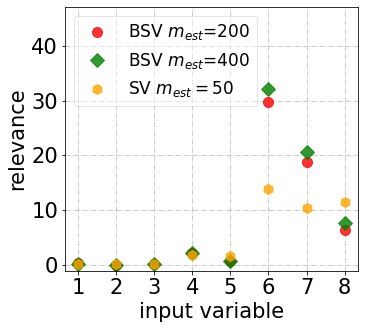

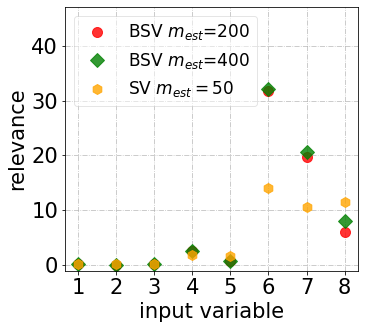

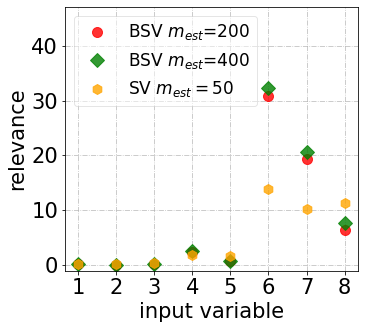

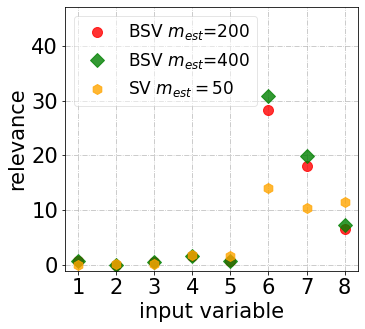

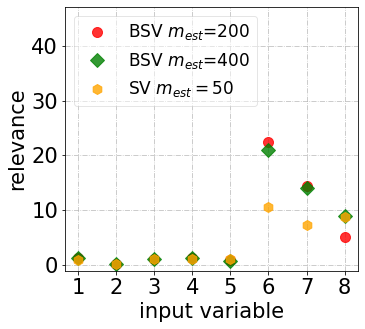

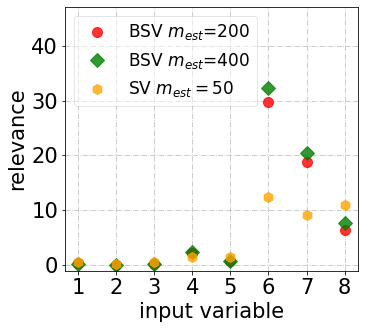

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Set default font size to 16
plt.rcParams.update({'font.size': 21})

# Create x-axis values (1 through 10)
x = np.arange(1, 9)

# Define markers and colors to match the reference image
markers = ['o', 'D', 'h', 'v', '+', '^',]  # H, O2, N, N2, He, O
colors = ['red', 'green', 'orange', 'blue', 'purple',  'brown']
# colors = ['m', 'r', 'g', 'b', 'c', 'k']   # magenta, red, green, blue, cyan, black

for i in range(len(speciess)):
    # Set up the plot
    plt.figure(figsize=(5.5, 5))
    for j in range(len(num_m_ests)):
        # plt.plot(x, 1/param_list[j], linestyle='None', markersize=10,label=r"BSV $m_{est}$=" + str(num_m_ests[j]), marker=markers[j],  color=colors[j], alpha=0.8) 
        plt.plot(x, 1/param_list[i*2 + j], linestyle='None', markersize=10,label=r"BSV $m_{est}$=" + str(num_m_ests[j]), marker=markers[j],  color=colors[j], alpha=0.8) 
    # sv results 0 is the variance 1:9 is the other parameters
    plt.plot(x, 1/np.array(param_list_sv[i][1:9]), linestyle='None', markersize=10,label=r"SV $m_{est}=50$", marker=markers[j+1],  color=colors[j+1], alpha=0.8)
     
    # Customize the plot
    plt.xticks(x)  # Use simple numbered x-axis
    # plt.yscale('log')
    plt.grid(True, ls="-.", alpha=0.8) #, which="both", 
    plt.xlabel('input variable')
    plt.ylabel('relevance')
    plt.ylim(-1, 47)
    # plt.title(f"Dataset {speciess[i]}")
    plt.legend(loc='upper left', fontsize=17, framealpha=0.5) #bbox_to_anchor=(1.05, 1), 

    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    plt.savefig(f"./fig/{speciess[i]}_params.pdf")

    plt.show()#

# # Plot points for each species
# for i, (species_name, marker, color) in enumerate(zip(species, markers, colors)):
#     # Get the corresponding parameters (using only m=200 results)
#     species_params = param_list[i*2 + 1]  # Get odd indices for m=200
#     plt.plot(x, 1/species_params, marker=marker, linestyle='None', 
#              label=species_name, color=color, markersize=8)

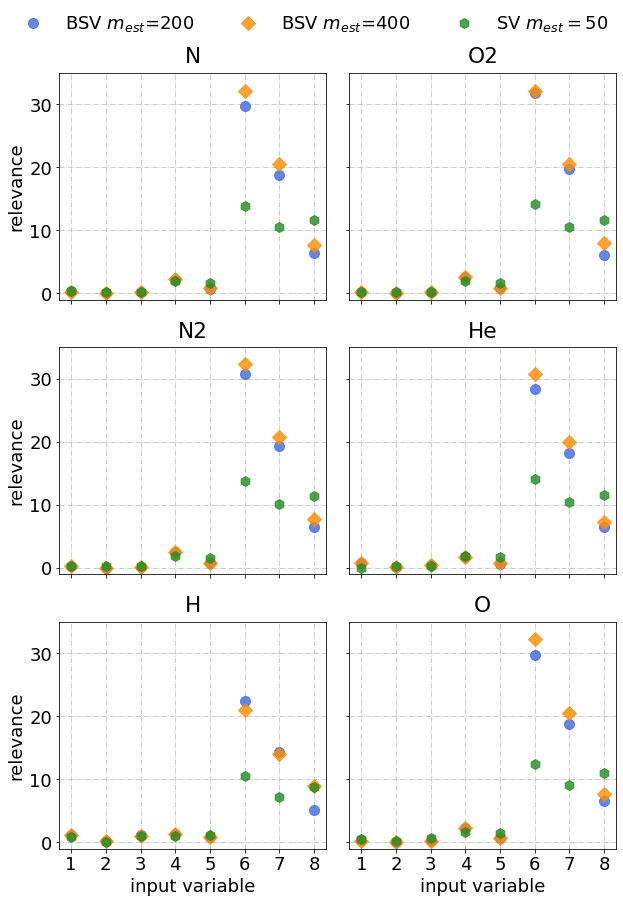

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set default font size
plt.rcParams.update({'font.size': 18})

# Data processing parameters
num_m_ests = [200, 400]
folds = 10
speciess = ["N", "O2", "N2", "He", "H", "O"]

# Process BSV data
param_list = []
for species in speciess:
    for num_m_est in num_m_ests:
        param_list_ = []
        for fold in range(1, folds):
            dir = f"../log/satellite/{species}"
            file_name = f"{dir}/theta_numPointsTotal1800000_numBlocksTotal18000_m{num_m_est}_seed{fold}_isScaled1_{species}.csv"
            try:   
                df = pd.read_csv(file_name, header=None)
                param_list_.append(df.iloc[0].values[2:10])
            except FileNotFoundError:
                continue
                
        param_array_ = np.array(param_list_)
        param_means_ = np.mean(param_array_, axis=0)
        param_list.append(param_means_)

# SV results
param_list_sv = [
    [1.42393238028999,3.14417046017901,3.80206609113493,3.5296716887804,0.524384114769954,0.594443084148257,0.0720267439231155,0.0955883344978679,0.0861223708114616],
    [1.41016952808123,5.39942506916278,4.28790193612321,4.2451074318842,0.515539155777866,0.591183617260562,0.0705946101787553,0.0946823147047651,0.0860897156395527],
    [1.52582742258293,3.05315012887577,4.10314549883096,2.90575229809965,0.537217898154586,0.610663800361358,0.0722879290510518,0.098024798747556,0.0875235170718118],
    [1.44024563699474,262.191355907451,4.0254784820191,3.90975210340995,0.517540858524512,0.586649073944036,0.0710606637464692,0.0952218994520268,0.0864942044357748],
    [5.63250788717237,1.09862904381361,6.5975411927154,0.91372222211258,0.935054271817414,0.858616080932198,0.0949842856658792,0.137695360618976,0.113196141662628],
    [2.07667252124848,1.82500714778064,5.54963363633788,1.46268532977646,0.628255816873663,0.662433160670471,0.0800881265789859,0.109071847038482,0.0911732919499203]
]

# Plotting
fig, axes = plt.subplots(3, 2, figsize=(9, 13), sharex=True, sharey=True)
axes = axes.flatten()

x = np.arange(1, 9)
markers = ['o', 'D', 'h', 'v', '+', '^']
colors = ['royalblue', 'darkorange', 'forestgreen']

# Plot each species
for i, species in enumerate(speciess):
    ax = axes[i]
    
    # Plot BSV results
    for j in range(len(num_m_ests)):
        ax.plot(x, 1/param_list[i*2 + j], 
                linestyle='None', 
                markersize=10,
                label=r"BSV $m_{est}$=" + str(num_m_ests[j]), 
                marker=markers[j],  
                color=colors[j], 
                alpha=0.8)
    
    # Plot SV results
    ax.plot(x, 1/np.array(param_list_sv[i][1:9]), 
            linestyle='None', 
            markersize=10,
            label=r"SV $m_{est}=50$", 
            marker=markers[j+1],  
            color=colors[j+1], 
            alpha=0.8)
    
    # Customize subplot
    ax.grid(True, ls="-.", alpha=0.8)
    ax.set_title(f"{species}", pad=10)
    
    # Add labels for edge subplots
    if i >= 4:
        ax.set_xlabel('input variable')
    if i % 2 == 0:
        ax.set_ylabel('relevance')

# Set common properties
for ax in axes:
    ax.set_xticks(x)
    ax.set_ylim(-1, 35)

# Add common legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.98), 
           ncol=3, fontsize=18, framealpha=0.)


# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Save and show
plt.savefig("./fig/all_species_params_summary.pdf", bbox_inches='tight')
plt.show()

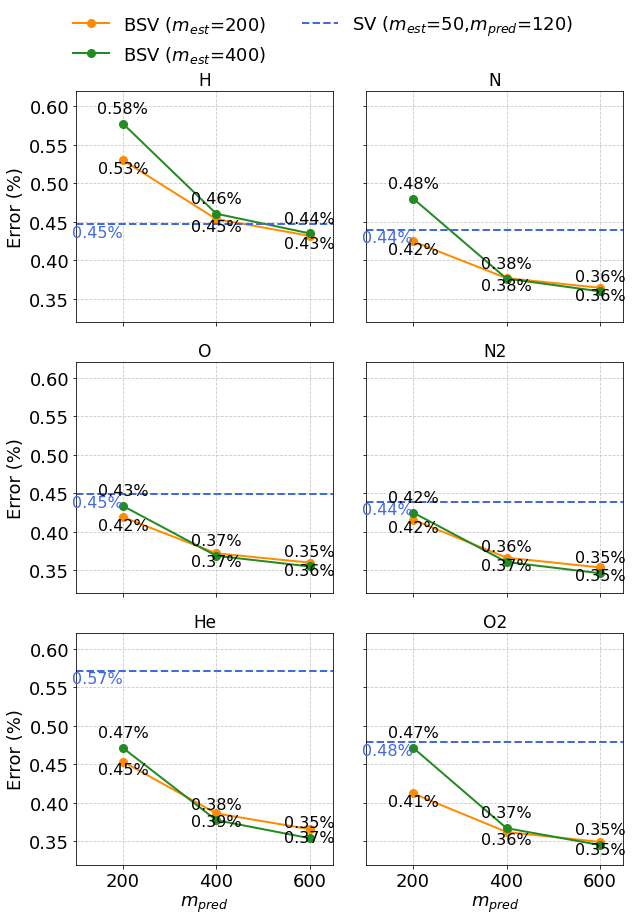

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 18})
np.random.seed(42)

rmspe_list_sv = [0.4466, 0.4397, 0.4485, 0.4386, 0.5714, 0.4786]
rmspe_list_cv = [1.6350, 1.6913, 1.6166, 1.6917, 1.7354, 1.6247]

# Parameters
m_pred_values = [200, 400, 600]  # For BSV
sv_m_pred = 120  # Single value for SV
species_list = ["H", "N", "O", "N2", "He","O2"]
methods = ['SV', 'BSV_200', 'BSV_400']
method_labels = [r'SV ($m_{est}$=50,$m_{pred}$=120)', r'BSV ($m_{est}$=200)', r'BSV ($m_{est}$=400)']
colors = ['royalblue', 'darkorange', 'forestgreen']

# Create figure with 2x3 subplots
fig, axes = plt.subplots(3, 2, figsize=(9, 13), sharex=True, sharey=True)
axes = axes.flatten()

# Base error values and noise levels for different methods (now as percentage errors)
base_errors = {'SV': 30, 'BSV_200': 25, 'BSV_400': 22}  # percentage errors
noise_levels = {'SV': 5, 'BSV_200': 4, 'BSV_400': 3}    # percentage noise

# Generate the data
error_data = {}
for method in methods:
    error_data[method] = {}
    if method == 'SV':
        m_pred_list = [sv_m_pred]
        for index_m_pred, m_pred in enumerate(m_pred_list):
            error_data[method][m_pred] = {}
            for index_species, species in enumerate(species_list):
                error_data[method][m_pred][species] = rmspe_list_sv[index_species]
    else:
        m_pred_list = m_pred_values
        m_est = 200 if method == 'BSV_200' else 400
        for index_m_pred, m_pred in enumerate(m_pred_list):
            error_data[method][m_pred] = {}
            for index_species, species in enumerate(species_list):
                rmspe_list = []
                for fold in range(1, 11):
                    file_name = f"../log/satellite/{species}/logFile_numPointsTotal1800000_numBlocksTotal18000_m{m_est}_seed{fold}_isScaled1_{species}_pred.csv"
                    try:
                        df = pd.read_csv(file_name)
                        rmspe = df['rmspe'].iloc[index_m_pred]
                        rmspe_list.append(rmspe)
                    except FileNotFoundError:
                        print(f"File {file_name} not found")
                        continue
                # print(rmspe_list)
                rmspe_list = np.asarray(rmspe_list)
                rmspe_mean = np.mean(rmspe_list, axis=0)
                # rmspe_std = np.std(rmspe_list, axis=0)
                error_data[method][m_pred][species] = rmspe_mean

# Plot subplots for each species
for i, species in enumerate(species_list):
    ax = axes[i]
    
    # Plot BSV methods as lines
    for j, method in enumerate(['BSV_200', 'BSV_400']):
        method_data = [error_data[method][m_pred][species] for m_pred in m_pred_values]
        ax.plot(m_pred_values, method_data, '-o', 
                label=method_labels[j+1], color=colors[j+1], 
                linewidth=2, markersize=8)
        
        # Add data labels
        if j == 0:
            for x, y in zip(m_pred_values, method_data):
                ax.text(x, y-0.02, f'{y:.2f}%', ha='center', va='bottom', fontsize=16)
        else:
            for x, y in zip(m_pred_values, method_data):
                ax.text(x, y+0.01, f'{y:.2f}%', ha='center', va='bottom', fontsize=16)
    
    # Plot SV as horizontal line
    sv_error = error_data['SV'][sv_m_pred][species]
    ax.axhline(y=sv_error, color=colors[0], linestyle='--', 
               label=method_labels[0], linewidth=2)
    ax.text(m_pred_values[0], sv_error-0.02, f'{sv_error:.2f}%', 
            ha='right', va='bottom', fontsize=16, color=colors[0])
    
    # Set title and customize subplot
    ax.set_title(f'{species}', fontsize=17)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Add axes labels
    if i >= 4:  # Bottom row
        ax.set_xlabel(r'$m_{pred}$')
    if i % 2 == 0:  # Leftmost column
        ax.set_ylabel('Error (%)')
    
    # Set x-axis limits and ticks
    ax.set_xlim(100, 650)
    ax.set_ylim(0.32, 0.62)
    ax.set_xticks(m_pred_values)

# Set common y-axis limit (adjust as needed)
# for ax in axes:
    # ax.set_ylim(10, 40)

# Add a common legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.0), 
           ncol=2, fontsize=18, framealpha=0.)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig("./fig/all_species_rmspe_summary.pdf", bbox_inches='tight')
plt.show()